# Imports

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report          

# 1. Lectura del dataset

In [85]:
np.random.seed(202302)
data = pd.read_csv('dataset.csv')
data

,edad,menopausia,tamannio_tumor,ganglios_linf_inflamados,grado,pecho,cuadrante,irradiado,clase
0,30-39,premeno,30-34,no,3,izquierdo,izquierdo_bajo,no,no-recurrente
1,40-49,premeno,20-24,no,2,derecho,derecho_alto,no,no-recurrente
2,40-49,premeno,20-24,no,2,izquierdo,izquierdo_bajo,no,no-recurrente
3,60-69,ge40,15-19,no,2,derecho,izquierdo_alto,no,no-recurrente
4,40-49,premeno,0-4,no,2,derecho,derecho_bajo,no,no-recurrente
5,60-69,ge40,15-19,no,2,izquierdo,izquierdo_bajo,no,no-recurrente
6,50-59,premeno,25-29,no,2,izquierdo,izquierdo_bajo,no,no-recurrente
7,40-49,premeno,20-24,no,2,izquierdo,izquierdo_alto,no,no-recurrente
8,50-59,ge40,15-19,no,2,derecho,derecho_alto,no,no-recurrente
9,50-59,ge40,40-44,no,3,izquierdo,izquierdo_alto,no,no-recurrente


## a) Cantidad de datos

In [12]:
len(data)

30

## b) Tipo de datos de cada variable

In [13]:
data.dtypes

edad                        object
menopausia                  object
tamannio_tumor              object
ganglios_linf_inflamados    object
grado                        int64
pecho                       object
cuadrante                   object
irradiado                   object
clase                       object
dtype: object

## c) Valores posibles de cada atributo

In [14]:
{col: data[col].unique() for col in data.columns}

{'edad': array(['30-39', '40-49', '60-69', '50-59'], dtype=object),
 'menopausia': array(['premeno', 'ge40'], dtype=object),
 'tamannio_tumor': array(['30-34', '20-24', '15-19', '0-4', '25-29', '40-44', '35-39',
        '50-54'], dtype=object),
 'ganglios_linf_inflamados': array(['no', 'si'], dtype=object),
 'grado': array([3, 2, 1]),
 'pecho': array(['izquierdo', 'derecho'], dtype=object),
 'cuadrante': array(['izquierdo_bajo', 'derecho_alto', 'izquierdo_alto', 'derecho_bajo',
        'central'], dtype=object),
 'irradiado': array(['no', 'si'], dtype=object),
 'clase': array(['no-recurrente', 'recurrente'], dtype=object)}

## d) Cantidad de registros por clase

In [15]:
data['clase'].value_counts()

clase
recurrente       16
no-recurrente    14
Name: count, dtype: int64

# 2. Entrenamiento

In [101]:
data['edad'] = pd.Categorical(data['edad']).codes
data['menopausia'] = pd.Categorical(data['menopausia']).codes
data['tamannio_tumor'] = pd.Categorical(data['tamannio_tumor']).codes
data['ganglios_linf_inflamados'] = pd.Categorical(data['ganglios_linf_inflamados']).codes
data['pecho'] = pd.Categorical(data['pecho']).codes
data['cuadrante'] = pd.Categorical(data['cuadrante']).codes
data['irradiado'] = pd.Categorical(data['irradiado']).codes
data['clase'] = pd.Categorical(data['clase']).codes
data

,edad,menopausia,tamannio_tumor,ganglios_linf_inflamados,grado,pecho,cuadrante,irradiado,clase
0,0,1,4,0,3,1,4,0,0
1,1,1,2,0,2,0,1,0,0
2,1,1,2,0,2,1,4,0,0
3,3,0,1,0,2,0,3,0,0
4,1,1,0,0,2,0,2,0,0
5,3,0,1,0,2,1,4,0,0
6,2,1,3,0,2,1,4,0,0
7,1,1,2,0,2,1,3,0,0
8,2,0,1,0,2,0,1,0,0
9,2,0,6,0,3,1,3,0,0


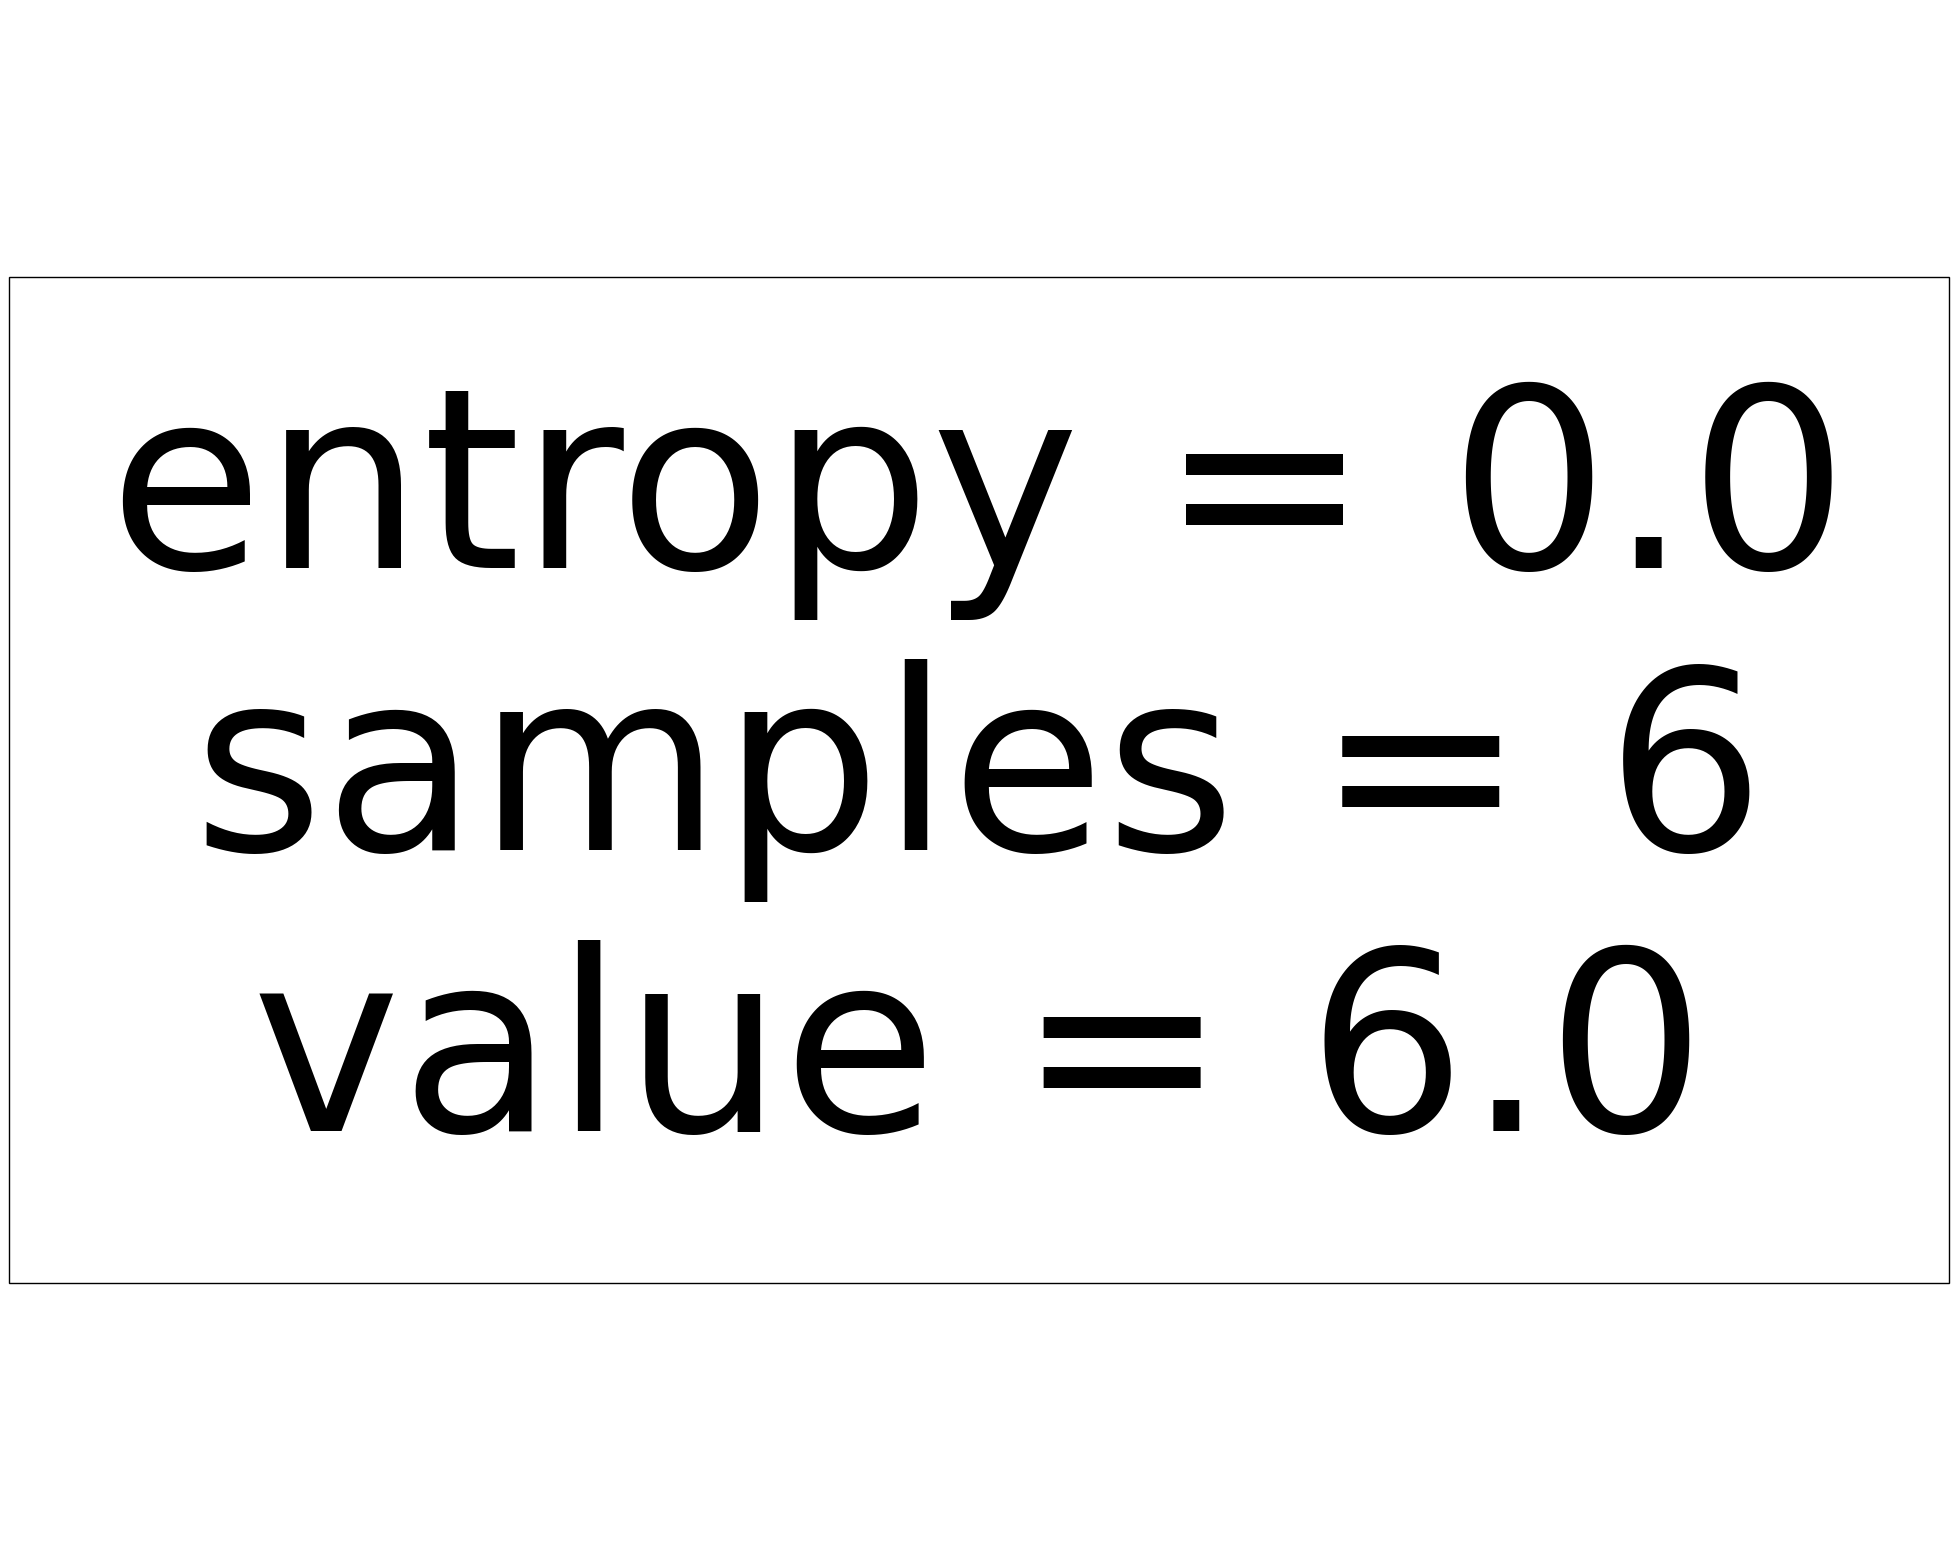

In [112]:
X = data.drop('clase', axis=1)
y = data['clase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=202302)
dt_classifier = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.15)
dt_classifier.fit(X_train, y_train)

tree_rules = export_text(dt_classifier, feature_names=list(X_train.columns))
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classifier, 
                   class_names=data.clase,
                   filled=True)
#plt.figure(figsize=(5, 5))
#plot_tree(dt_classifier, filled=True, feature_names=list(X_train.columns), class_names=["clase 0", "clase 1"])
#plt.show()

In [61]:
from sklearn.tree import export_graphviz
import graphviz

# Generar una representación Graphviz del árbol
dot_data = export_graphviz(
    dt_classifier,
    out_file=None,
    feature_names=list(X_train.columns),
    class_names=["no-recurrente", "recurrente"],
    filled=True,
    rounded=True,
    special_characters=True
)

# Visualizar el árbol con Graphviz
graph = graphviz.Source(dot_data)
graph.render("arbol_decision")  # Guarda el árbol en un archivo
graph.view("arbol_decision")  # Abre el visor de Graphviz para visualizar el árbol


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH